In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
#tokenization
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

In [ ]:
df= pd.read_excel("final_data.xlsx")

In [ ]:
df.head()

,Unnamed: 0,date,Tweet,Close
0,0,2022-12-30,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",2547.20
1,1,2022-12-29,#Reliance The Name IS Enough: RIL is taking ni...,2543.30
2,2,2022-12-28,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,2544.45
3,3,2022-12-27,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",2544.70
4,4,2022-12-26,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,2524.05


In [ ]:
df= df[["Tweet"]]

In [ ]:
# remove special characters, numbers, punctuations
df['tidy text'] = df['Tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
#VADER Analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# Lets define function to remove all stopwords and words with length than 3 in data\
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if len(token)>=3 and token not in stopwords.words('english'):
            result.append(token)
            
    return result
    

In [ ]:
df.head()

,Tweet,tidy text
0,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",Reliance Buys Stake In Lotus Chocolate Up...
1,#Reliance The Name IS Enough: RIL is taking ni...,#Reliance The Name IS Enough RIL is taking ni...
2,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,Commodity Market thNOV #GOLD TARGET #BA...
3,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",BIRTHDAY ANAGRAM QUESTION # AT AN ATTAR ...
4,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,#RelianceIndustries RELIANCE Weekly Chart #Su...


In [ ]:
df["Vader Scores"]= df['tidy text'].apply(lambda review:sid.polarity_scores(review))

In [ ]:
df["Vader Compound Score"]= df["Vader Scores"].apply(lambda d:d['compound'])

In [ ]:
df.head()

,Tweet,tidy text,Vader Scores,Vader Compound Score
0,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",Reliance Buys Stake In Lotus Chocolate Up...,"{'neg': 0.034, 'neu': 0.884, 'pos': 0.082, 'co...",0.9996
1,#Reliance The Name IS Enough: RIL is taking ni...,#Reliance The Name IS Enough RIL is taking ni...,"{'neg': 0.023, 'neu': 0.895, 'pos': 0.082, 'co...",0.9997
2,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,Commodity Market thNOV #GOLD TARGET #BA...,"{'neg': 0.015, 'neu': 0.887, 'pos': 0.098, 'co...",0.9998
3,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",BIRTHDAY ANAGRAM QUESTION # AT AN ATTAR ...,"{'neg': 0.031, 'neu': 0.855, 'pos': 0.113, 'co...",0.9997
4,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,#RelianceIndustries RELIANCE Weekly Chart #Su...,"{'neg': 0.024, 'neu': 0.894, 'pos': 0.083, 'co...",0.9993


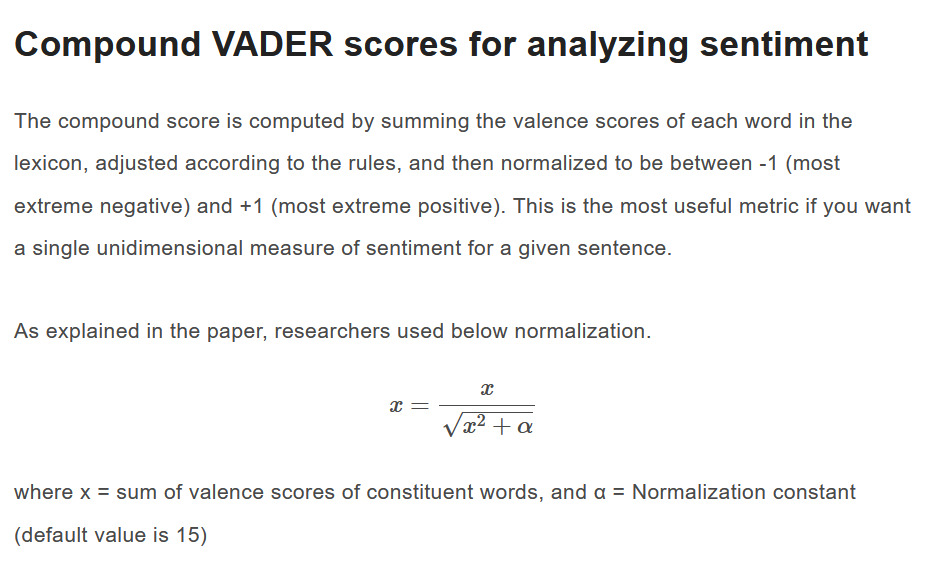

In [ ]:
#Text Blob

In [ ]:
scene=list(df["tidy text"])

In [ ]:
from textblob import TextBlob

senti=[]
for i in range(0,len(scene)):
    my_valence=TextBlob(scene[i])
    senti.append(my_valence.sentiment[0])

In [ ]:
df["Textblob Score"]= senti

In [ ]:
df.head()

,Tweet,tidy text,Vader Scores,Vader Compound Score,Textblob Score
0,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",Reliance Buys Stake In Lotus Chocolate Up...,"{'neg': 0.034, 'neu': 0.884, 'pos': 0.082, 'co...",0.9996,0.127198
1,#Reliance The Name IS Enough: RIL is taking ni...,#Reliance The Name IS Enough RIL is taking ni...,"{'neg': 0.023, 'neu': 0.895, 'pos': 0.082, 'co...",0.9997,0.113736
2,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,Commodity Market thNOV #GOLD TARGET #BA...,"{'neg': 0.015, 'neu': 0.887, 'pos': 0.098, 'co...",0.9998,0.170223
3,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",BIRTHDAY ANAGRAM QUESTION # AT AN ATTAR ...,"{'neg': 0.031, 'neu': 0.855, 'pos': 0.113, 'co...",0.9997,0.108293
4,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,#RelianceIndustries RELIANCE Weekly Chart #Su...,"{'neg': 0.024, 'neu': 0.894, 'pos': 0.083, 'co...",0.9993,0.135712


In [ ]:
#Emolex Sentiment

In [ ]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

In [ ]:
!pip install -U LeXmo
from LeXmo import LeXmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
emo=LeXmo.LeXmo(scene[1])

In [ ]:
print(emo)

{'text': '#Reliance The Name IS Enough  RIL is taking nice support around     days EMA and it might be time to compound the stock  If you don t have Reliance it might be a good opportunity to add  If it goes down will definitely provide an opportunity to average  https   t co uN R  Qfag                                                                              #Reliance #Wedding #MukeshDhirubhaiAmbani #Marriage #Rajasthan   https   t co I Q Zj  F  #Reliance Consumer Products Ltd along with Reliance Retail launched open offer to acquire     equity share capital of #Lotus Chocolate Co Ltd from public shareholders at         share  CMP        Reliance The Name IS Enough   #RELIANCE chart on  TradingView https   t co  r beid gL #volition #reliance #beauty  https   t co MTFc odCjh #Indian billionaire #MukeshAmbani outlined his ambitions for various businesses under his flagship #RelianceIndustries that are now helmed by his three children  in a clear sign that leadership transition was fi

In [ ]:
del emo['text']

In [ ]:
print(emo)

{'anger': 0.004760919064375905, 'anticipation': 0.014075760712067896, 'disgust': 0.0018629683295383979, 'fear': 0.0026909542537776857, 'joy': 0.009728834609811634, 'negative': 0.004760919064375905, 'positive': 0.024632581246118817, 'sadness': 0.0010349824052991099, 'surprise': 0.0033119436969571516, 'trust': 0.020492651624922375}


In [ ]:
df["Plutchik"]= df["tidy text"].apply(lambda scene:LeXmo.LeXmo(scene))

In [ ]:
df

,Tweet,tidy text,Vader Scores,Vader Compound Score,Textblob Score,Plutchik
0,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",Reliance Buys Stake In Lotus Chocolate Up...,"{'neg': 0.034, 'neu': 0.884, 'pos': 0.082, 'co...",0.9996,0.127198,{'text': 'Reliance Buys Stake In Lotus Cho...
1,#Reliance The Name IS Enough: RIL is taking ni...,#Reliance The Name IS Enough RIL is taking ni...,"{'neg': 0.023, 'neu': 0.895, 'pos': 0.082, 'co...",0.9997,0.113736,{'text': '#Reliance The Name IS Enough RIL is...
2,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,Commodity Market thNOV #GOLD TARGET #BA...,"{'neg': 0.015, 'neu': 0.887, 'pos': 0.098, 'co...",0.9998,0.170223,{'text': 'Commodity Market thNOV #GOLD T...
3,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",BIRTHDAY ANAGRAM QUESTION # AT AN ATTAR ...,"{'neg': 0.031, 'neu': 0.855, 'pos': 0.113, 'co...",0.9997,0.108293,{'text': 'BIRTHDAY ANAGRAM QUESTION # AT A...
4,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,#RelianceIndustries RELIANCE Weekly Chart #Su...,"{'neg': 0.024, 'neu': 0.894, 'pos': 0.083, 'co...",0.9993,0.135712,{'text': '#RelianceIndustries RELIANCE Weekly...
...,...,...,...,...,...,...
243,"My list is ready, is it Monday yet? \n\n#First...",My list is ready is it Monday yet #FirstFr...,"{'neg': 0.024, 'neu': 0.869, 'pos': 0.107, 'co...",0.9998,0.149203,{'text': 'My list is ready is it Monday yet ...
244,"January 06, 2022 at 02:18PM @Manish Singh #Rel...",January at PM Manish Singh #Rel...,"{'neg': 0.027, 'neu': 0.916, 'pos': 0.057, 'co...",0.9989,0.084713,{'text': 'January at PM Manish ...
245,El #Reliance es una herramienta recomendada po...,El #Reliance es una herramienta recomendada po...,"{'neg': 0.026, 'neu': 0.857, 'pos': 0.117, 'co...",0.9996,0.145476,{'text': 'El #Reliance es una herramienta reco...
246,#RELIANCE - RELIANCE IND - TradingView - https...,#RELIANCE RELIANCE IND TradingView https...,"{'neg': 0.057, 'neu': 0.832, 'pos': 0.111, 'co...",0.9994,0.107530,{'text': '#RELIANCE RELIANCE IND TradingVi...


In [ ]:
for i in df.Plutchik:
  del i['text']

In [ ]:
df.Plutchik[2]

{'anger': 0.002718622564567286,
 'anticipation': 0.014952424105120073,
 'disgust': 0.0018124150430448573,
 'fear': 0.005210693248753965,
 'joy': 0.01042138649750793,
 'negative': 0.006116900770276394,
 'positive': 0.02492070684186679,
 'sadness': 0.001359311282283643,
 'surprise': 0.002718622564567286,
 'trust': 0.022202084277299503}

In [ ]:
emolex=[]

for i in df.Plutchik:
  score= (i['positive']- i['negative'])
  emolex.append(score)

In [ ]:
df["EmoLex Score"]= emolex

In [ ]:
df

,Tweet,tidy text,Vader Scores,Vader Compound Score,Textblob Score,Plutchik,EmoLex Score
0,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",Reliance Buys Stake In Lotus Chocolate Up...,"{'neg': 0.034, 'neu': 0.884, 'pos': 0.082, 'co...",0.9996,0.127198,"{'anger': 0.007792713812585233, 'anticipation'...",0.019482
1,#Reliance The Name IS Enough: RIL is taking ni...,#Reliance The Name IS Enough RIL is taking ni...,"{'neg': 0.023, 'neu': 0.895, 'pos': 0.082, 'co...",0.9997,0.113736,"{'anger': 0.004760919064375905, 'anticipation'...",0.019872
2,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,Commodity Market thNOV #GOLD TARGET #BA...,"{'neg': 0.015, 'neu': 0.887, 'pos': 0.098, 'co...",0.9998,0.170223,"{'anger': 0.002718622564567286, 'anticipation'...",0.018804
3,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",BIRTHDAY ANAGRAM QUESTION # AT AN ATTAR ...,"{'neg': 0.031, 'neu': 0.855, 'pos': 0.113, 'co...",0.9997,0.108293,"{'anger': 0.005555555555555556, 'anticipation'...",0.028947
4,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,#RelianceIndustries RELIANCE Weekly Chart #Su...,"{'neg': 0.024, 'neu': 0.894, 'pos': 0.083, 'co...",0.9993,0.135712,"{'anger': 0.006431767337807606, 'anticipation'...",0.013423
...,...,...,...,...,...,...,...
243,"My list is ready, is it Monday yet? \n\n#First...",My list is ready is it Monday yet #FirstFr...,"{'neg': 0.024, 'neu': 0.869, 'pos': 0.107, 'co...",0.9998,0.149203,"{'anger': 0.002765208647561589, 'anticipation'...",0.018100
244,"January 06, 2022 at 02:18PM @Manish Singh #Rel...",January at PM Manish Singh #Rel...,"{'neg': 0.027, 'neu': 0.916, 'pos': 0.057, 'co...",0.9989,0.084713,"{'anger': 0.0029423303256178894, 'anticipation...",0.008435
245,El #Reliance es una herramienta recomendada po...,El #Reliance es una herramienta recomendada po...,"{'neg': 0.026, 'neu': 0.857, 'pos': 0.117, 'co...",0.9996,0.145476,"{'anger': 0.00477326968973747, 'anticipation':...",0.029833
246,#RELIANCE - RELIANCE IND - TradingView - https...,#RELIANCE RELIANCE IND TradingView https...,"{'neg': 0.057, 'neu': 0.832, 'pos': 0.111, 'co...",0.9994,0.107530,"{'anger': 0.007027192178429576, 'anticipation'...",0.015582


In [ ]:
#Emotional Analysis

In [ ]:
df.Plutchik

0      {'anger': 0.007792713812585233, 'anticipation'...
1      {'anger': 0.004760919064375905, 'anticipation'...
2      {'anger': 0.002718622564567286, 'anticipation'...
3      {'anger': 0.005555555555555556, 'anticipation'...
4      {'anger': 0.006431767337807606, 'anticipation'...
                             ...                        
243    {'anger': 0.002765208647561589, 'anticipation'...
244    {'anger': 0.0029423303256178894, 'anticipation...
245    {'anger': 0.00477326968973747, 'anticipation':...
246    {'anger': 0.007027192178429576, 'anticipation'...
247    {'anger': 0.008527827648114902, 'anticipation'...
Name: Plutchik, Length: 248, dtype: object

In [ ]:
anger=[]

for i in df.Plutchik:
  anger.append(i['anger'])

In [ ]:
df["Anger"]= anger

In [ ]:
#Anticipation

In [ ]:
Anticipation=[]

for i in df.Plutchik:
  Anticipation.append(i['anticipation'])

In [ ]:
df["Anticipation"]= Anticipation

In [ ]:
#Disgust

In [ ]:
Disgust=[]

for i in df.Plutchik:
  Disgust.append(i['disgust'])

In [ ]:
df["Disgust"]= Disgust

In [ ]:
#Fear

In [ ]:
Fear=[]

for i in df.Plutchik:
  Fear.append(i['fear'])

In [ ]:
df["Fear"]= Fear

In [ ]:
#Joy

In [ ]:
Joy=[]

for i in df.Plutchik:
  Joy.append(i['joy'])

In [ ]:
df["Joy"]= Joy

In [ ]:
#Sadness

In [ ]:
Sadness=[]

for i in df.Plutchik:
  Sadness.append(i['sadness'])

In [ ]:
df["Sadness"]= Sadness

In [ ]:
#Surprise

In [ ]:
Surprise=[]

for i in df.Plutchik:
  Surprise.append(i['surprise'])

In [ ]:
df["Surprise"]= Surprise

In [ ]:
#Trust

In [ ]:
Trust=[]

for i in df.Plutchik:
  Trust.append(i['trust'])

In [ ]:
df["Trust"]= Trust

In [ ]:
#cross check

In [ ]:
df.head()

,Tweet,tidy text,Vader Scores,Vader Compound Score,Textblob Score,Plutchik,EmoLex Score,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",Reliance Buys Stake In Lotus Chocolate Up...,"{'neg': 0.034, 'neu': 0.884, 'pos': 0.082, 'co...",0.9996,0.127198,"{'anger': 0.007792713812585233, 'anticipation'...",0.019482,0.007793,0.016170,0.002922,0.005650,0.010325,0.002727,0.002922,0.022014
1,#Reliance The Name IS Enough: RIL is taking ni...,#Reliance The Name IS Enough RIL is taking ni...,"{'neg': 0.023, 'neu': 0.895, 'pos': 0.082, 'co...",0.9997,0.113736,"{'anger': 0.004760919064375905, 'anticipation'...",0.019872,0.004761,0.014076,0.001863,0.002691,0.009729,0.001035,0.003312,0.020493
2,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,Commodity Market thNOV #GOLD TARGET #BA...,"{'neg': 0.015, 'neu': 0.887, 'pos': 0.098, 'co...",0.9998,0.170223,"{'anger': 0.002718622564567286, 'anticipation'...",0.018804,0.002719,0.014952,0.001812,0.005211,0.010421,0.001359,0.002719,0.022202
3,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",BIRTHDAY ANAGRAM QUESTION # AT AN ATTAR ...,"{'neg': 0.031, 'neu': 0.855, 'pos': 0.113, 'co...",0.9997,0.108293,"{'anger': 0.005555555555555556, 'anticipation'...",0.028947,0.005556,0.021053,0.000877,0.003801,0.011696,0.001462,0.003801,0.031579
4,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,#RelianceIndustries RELIANCE Weekly Chart #Su...,"{'neg': 0.024, 'neu': 0.894, 'pos': 0.083, 'co...",0.9993,0.135712,"{'anger': 0.006431767337807606, 'anticipation'...",0.013423,0.006432,0.015660,0.000559,0.006991,0.006711,0.002237,0.003356,0.032998


In [ ]:
df1= pd.read_excel("final_data.xlsx")

In [ ]:
df1.head()

,Unnamed: 0,date,Tweet,Close
0,0,2022-12-30,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",2547.20
1,1,2022-12-29,#Reliance The Name IS Enough: RIL is taking ni...,2543.30
2,2,2022-12-28,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,2544.45
3,3,2022-12-27,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",2544.70
4,4,2022-12-26,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,2524.05


In [ ]:
df1= df1.drop("Unnamed: 0", axis=1)

In [ ]:
df1.head()

,date,Tweet,Close
0,2022-12-30,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",2547.20
1,2022-12-29,#Reliance The Name IS Enough: RIL is taking ni...,2543.30
2,2022-12-28,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,2544.45
3,2022-12-27,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",2544.70
4,2022-12-26,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,2524.05


In [ ]:
df_final= pd.concat([df1, df], axis=1)
df_final.head()

,date,Tweet,Close,Tweet,tidy text,Vader Scores,Vader Compound Score,Textblob Score,Plutchik,EmoLex Score,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,2022-12-30,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",2547.20,"Reliance Buys 51% Stake In Lotus Chocolate, Up...",Reliance Buys Stake In Lotus Chocolate Up...,"{'neg': 0.034, 'neu': 0.884, 'pos': 0.082, 'co...",0.9996,0.127198,"{'anger': 0.007792713812585233, 'anticipation'...",0.019482,0.007793,0.016170,0.002922,0.005650,0.010325,0.002727,0.002922,0.022014
1,2022-12-29,#Reliance The Name IS Enough: RIL is taking ni...,2543.30,#Reliance The Name IS Enough: RIL is taking ni...,#Reliance The Name IS Enough RIL is taking ni...,"{'neg': 0.023, 'neu': 0.895, 'pos': 0.082, 'co...",0.9997,0.113736,"{'anger': 0.004760919064375905, 'anticipation'...",0.019872,0.004761,0.014076,0.001863,0.002691,0.009729,0.001035,0.003312,0.020493
2,2022-12-28,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,2544.45,Commodity Market| 28thNOV22\n\n#GOLD👉TARGET\n\...,Commodity Market thNOV #GOLD TARGET #BA...,"{'neg': 0.015, 'neu': 0.887, 'pos': 0.098, 'co...",0.9998,0.170223,"{'anger': 0.002718622564567286, 'anticipation'...",0.018804,0.002719,0.014952,0.001812,0.005211,0.010421,0.001359,0.002719,0.022202
3,2022-12-27,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",2544.70,"BIRTHDAY ANAGRAM QUESTION # 7:\n""AT AN ATTAR"" ...",BIRTHDAY ANAGRAM QUESTION # AT AN ATTAR ...,"{'neg': 0.031, 'neu': 0.855, 'pos': 0.113, 'co...",0.9997,0.108293,"{'anger': 0.005555555555555556, 'anticipation'...",0.028947,0.005556,0.021053,0.000877,0.003801,0.011696,0.001462,0.003801,0.031579
4,2022-12-26,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,2524.05,#RelianceIndustries $RELIANCE Weekly Chart\n#S...,#RelianceIndustries RELIANCE Weekly Chart #Su...,"{'neg': 0.024, 'neu': 0.894, 'pos': 0.083, 'co...",0.9993,0.135712,"{'anger': 0.006431767337807606, 'anticipation'...",0.013423,0.006432,0.015660,0.000559,0.006991,0.006711,0.002237,0.003356,0.032998


In [ ]:
final_pre-ml= df_final.to_excel("final_pre-ml.xlsx")

In [ ]:
final_excel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')